In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
def plot_swarmplot(file_path):
    # 读取CSV文件
    data = pd.read_csv(file_path)
    
    # 查看数据结构
    print("原始数据形状:", data.shape)
    print("列名:", data.columns.tolist())
    print("\n前几行数据:")
    print(data.head())
    print("\n数据基本信息:")
    print(data.info())
    
    # 数据清洗 - 将Steps列转换为数值类型，'NaN'字符串转为真正的NaN
    data['Steps'] = pd.to_numeric(data['Steps'], errors='coerce')
    
    print(f"\n处理后的数据形状: {data.shape}")
    print("\n各算法的数据量:")
    print(data['Algorithm'].value_counts())
    print("\n步数统计:")
    print(data.groupby('Algorithm')['Steps'].describe())
    print("\n用时统计(微秒):")
    print(data.groupby('Algorithm')['Time_us'].describe())
    
    # 设置绘图风格
    plt.figure(figsize=(14, 10))
    sns.set_style("whitegrid")
    sns.set_palette("husl")
    
    # 创建子图：步数分布和用时分布
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))
    
    # 1. 步数的swarmplot
    sns.swarmplot(
        x='Algorithm', 
        y='Steps', 
        data=data,
        size=2,
        alpha=0.7,
        ax=ax1
    )
    # 添加箱线图
    sns.boxplot(
        x='Algorithm', 
        y='Steps', 
        data=data,
        width=0.3,
        boxprops={'alpha': 0.3},
        showfliers=False,
        ax=ax1
    )
    ax1.set_title('Swarm Plot of Steps by Search Algorithm', fontsize=16, fontweight='bold')
    ax1.set_xlabel('Search Algorithm', fontsize=12)
    ax1.set_ylabel('Number of Steps', fontsize=12)
    ax1.tick_params(axis='x', rotation=45)
    
    # 2. 用时的swarmplot
    sns.swarmplot(
        x='Algorithm', 
        y='Time_us', 
        data=data,
        size=2,
        alpha=0.7,
        ax=ax2
    )
    sns.boxplot(
        x='Algorithm', 
        y='Time_us', 
        data=data,
        width=0.3,
        boxprops={'alpha': 0.3},
        showfliers=False,
        ax=ax2
    )
    ax2.set_title('Swarm Plot of Execution Time by Search Algorithm', fontsize=16, fontweight='bold')
    ax2.set_xlabel('Search Algorithm', fontsize=12)
    ax2.set_ylabel('Execution Time (microseconds)', fontsize=12)
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return data


In [3]:
def comprehensive_comparison(data):
    # 创建更全面的比较图表
    fig, axes = plt.subplots(3, 3, figsize=(20, 15))
    
    # 数据预处理
    data['Steps'] = pd.to_numeric(data['Steps'], errors='coerce')
    
    # 1. 步数箱线图
    sns.boxplot(x='Algorithm', y='Steps', data=data, ax=axes[0,0])
    axes[0,0].set_title('Steps - Box Plot')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # 2. 步数小提琴图
    sns.violinplot(x='Algorithm', y='Steps', data=data, ax=axes[0,1])
    axes[0,1].set_title('Steps - Violin Plot')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # 3. 步数蜂群图
    sns.swarmplot(x='Algorithm', y='Steps', data=data, ax=axes[0,2], size=2)
    axes[0,2].set_title('Steps - Swarm Plot')
    axes[0,2].tick_params(axis='x', rotation=45)
    
    # 4. 用时箱线图
    sns.boxplot(x='Algorithm', y='Time_us', data=data, ax=axes[1,0])
    axes[1,0].set_title('Time - Box Plot (microseconds)')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # 5. 用时小提琴图
    sns.violinplot(x='Algorithm', y='Time_us', data=data, ax=axes[1,1])
    axes[1,1].set_title('Time - Violin Plot (microseconds)')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    # 6. 步数vs用时散点图
    for algo in data['Algorithm'].unique():
        algo_data = data[data['Algorithm'] == algo]
        axes[1,2].scatter(algo_data['Steps'], algo_data['Time_us'], label=algo, alpha=0.6)
    axes[1,2].set_title('Steps vs Execution Time')
    axes[1,2].set_xlabel('Steps')
    axes[1,2].set_ylabel('Time (microseconds)')
    axes[1,2].legend()
    
    # 7. 步数KDE图
    for algo in data['Algorithm'].unique():
        algo_data = data[data['Algorithm'] == algo]['Steps'].dropna()
        if len(algo_data) > 0:
            sns.kdeplot(algo_data, label=algo, ax=axes[2,0], fill=True, alpha=0.5)
    axes[2,0].set_title('Steps - KDE Plot')
    axes[2,0].legend()
    
    # 8. 用时KDE图
    for algo in data['Algorithm'].unique():
        algo_data = data[data['Algorithm'] == algo]['Time_us'].dropna()
        if len(algo_data) > 0:
            sns.kdeplot(algo_data, label=algo, ax=axes[2,1], fill=True, alpha=0.5)
    axes[2,1].set_title('Time - KDE Plot (microseconds)')
    axes[2,1].legend()
    
    # 9. 成功率统计
    success_rates = data.groupby('Algorithm')['Steps'].apply(
        lambda x: (x.notna().sum() / len(x)) * 100
    ).reset_index()
    success_rates.columns = ['Algorithm', 'SuccessRate']
    sns.barplot(x='Algorithm', y='SuccessRate', data=success_rates, ax=axes[2,2])
    axes[2,2].set_title('Success Rate by Algorithm (%)')
    axes[2,2].set_ylabel('Success Rate (%)')
    axes[2,2].tick_params(axis='x', rotation=45)
    # 在柱状图上添加数值标签
    for i, v in enumerate(success_rates['SuccessRate']):
        axes[2,2].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # 打印详细统计信息
    print("\n" + "="*50)
    print("详细统计分析")
    print("="*50)
    
    print("\n各算法成功率:")
    for algo in data['Algorithm'].unique():
        algo_data = data[data['Algorithm'] == algo]
        success_count = algo_data['Steps'].notna().sum()
        total_count = len(algo_data)
        success_rate = (success_count / total_count) * 100
        print(f"{algo}: {success_count}/{total_count} ({success_rate:.2f}%)")
    
    print("\n步数统计 (仅成功案例):")
    successful_data = data[data['Steps'].notna()]
    print(successful_data.groupby('Algorithm')['Steps'].describe())
    
    print("\n用时统计 (所有案例):")
    print(data.groupby('Algorithm')['Time_us'].describe())
    
    return data

In [4]:
def performance_analysis(data):
    """性能分析：计算效率和成功率指标"""
    
    # 数据预处理
    data['Steps'] = pd.to_numeric(data['Steps'], errors='coerce')
    data['Success'] = data['Steps'].notna()
    
    # 计算各算法的关键指标
    metrics = []
    for algo in data['Algorithm'].unique():
        algo_data = data[data['Algorithm'] == algo]
        
        # 成功率
        success_rate = algo_data['Success'].mean() * 100
        
        # 平均步数（仅成功案例）
        avg_steps = algo_data[algo_data['Success']]['Steps'].mean()
        
        # 平均用时
        avg_time = algo_data['Time_us'].mean()
        
        # 时间标准差
        time_std = algo_data['Time_us'].std()
        
        # 效率指标：成功案例的平均每步用时
        if avg_steps > 0:
            efficiency = avg_time / avg_steps
        else:
            efficiency = np.nan
            
        metrics.append({
            'Algorithm': algo,
            'SuccessRate': success_rate,
            'AvgSteps': avg_steps,
            'AvgTime_us': avg_time,
            'TimeStd_us': time_std,
            'Efficiency_us_per_step': efficiency
        })
    
    metrics_df = pd.DataFrame(metrics)
    
    # 绘制性能比较图
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 成功率比较
    sns.barplot(x='Algorithm', y='SuccessRate', data=metrics_df, ax=axes[0,0])
    axes[0,0].set_title('Success Rate Comparison (%)')
    axes[0,0].tick_params(axis='x', rotation=45)
    for i, v in enumerate(metrics_df['SuccessRate']):
        axes[0,0].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')
    
    # 平均步数比较
    sns.barplot(x='Algorithm', y='AvgSteps', data=metrics_df, ax=axes[0,1])
    axes[0,1].set_title('Average Steps (Successful Cases)')
    axes[0,1].tick_params(axis='x', rotation=45)
    for i, v in enumerate(metrics_df['AvgSteps']):
        if not np.isnan(v):
            axes[0,1].text(i, v + 0.5, f'{v:.1f}', ha='center', va='bottom')
    
    # 平均用时比较
    sns.barplot(x='Algorithm', y='AvgTime_us', data=metrics_df, ax=axes[1,0])
    axes[1,0].set_title('Average Execution Time (microseconds)')
    axes[1,0].tick_params(axis='x', rotation=45)
    for i, v in enumerate(metrics_df['AvgTime_us']):
        axes[1,0].text(i, v + max(metrics_df['AvgTime_us'])*0.01, f'{v:.0f}', ha='center', va='bottom')
    
    # 效率比较
    efficiency_data = metrics_df.dropna(subset=['Efficiency_us_per_step'])
    if len(efficiency_data) > 0:
        sns.barplot(x='Algorithm', y='Efficiency_us_per_step', data=efficiency_data, ax=axes[1,1])
        axes[1,1].set_title('Efficiency (Time per Step)')
        axes[1,1].tick_params(axis='x', rotation=45)
        for i, v in enumerate(efficiency_data['Efficiency_us_per_step']):
            axes[1,1].text(i, v + max(efficiency_data['Efficiency_us_per_step'])*0.01, f'{v:.1f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    print("\n性能指标汇总:")
    print(metrics_df.round(2))
    
    return metrics_df


原始数据形状: (400, 4)
列名: ['Algorithm', 'TestID', 'Steps', 'Time_us']

前几行数据:
              Algorithm  TestID  Steps  Time_us
0  Breadth-First Search       1      8  27957.0
1  Breadth-First Search       2      8  13201.0
2  Breadth-First Search       3     10  39354.0
3  Breadth-First Search       4      0    140.0
4  Breadth-First Search       5      8  14740.0

数据基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Algorithm  400 non-null    object 
 1   TestID     400 non-null    int64  
 2   Steps      400 non-null    int64  
 3   Time_us    400 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 12.6+ KB
None

处理后的数据形状: (400, 4)

各算法的数据量:
Algorithm
Breadth-First Search                     100
Depth-First Search                       100
Heuristic Search (Incorrect Num)         100
Heuristic Search (Manhattan Distance)    10

<Figure size 1400x1000 with 0 Axes>

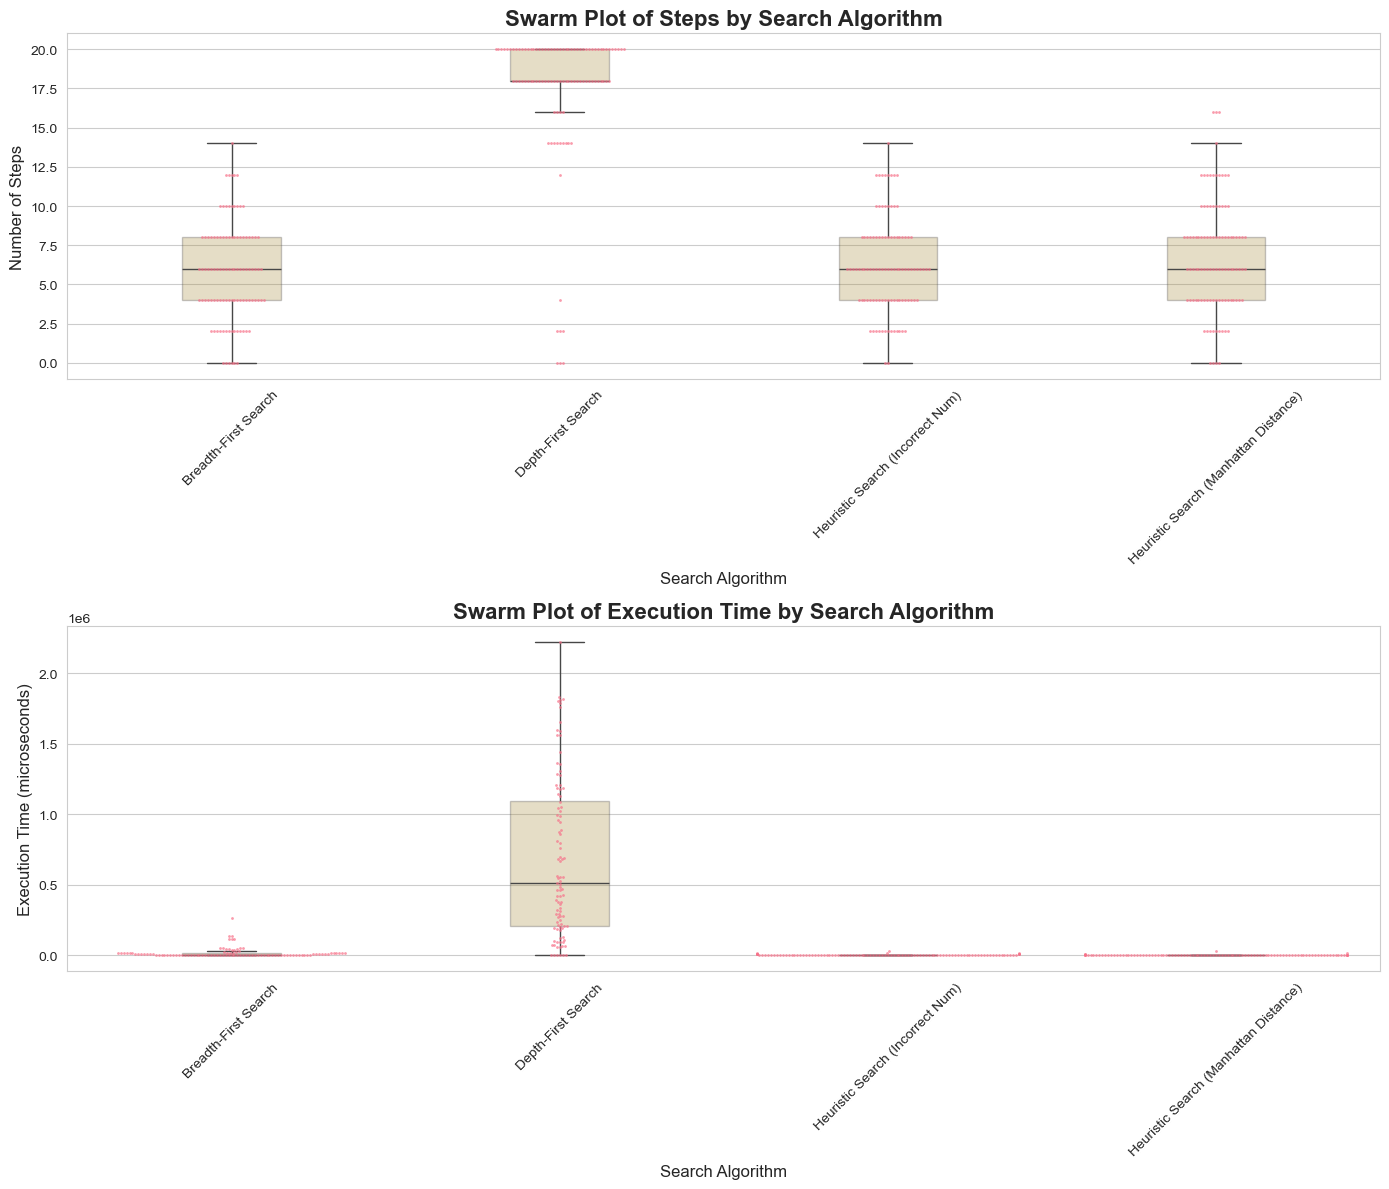

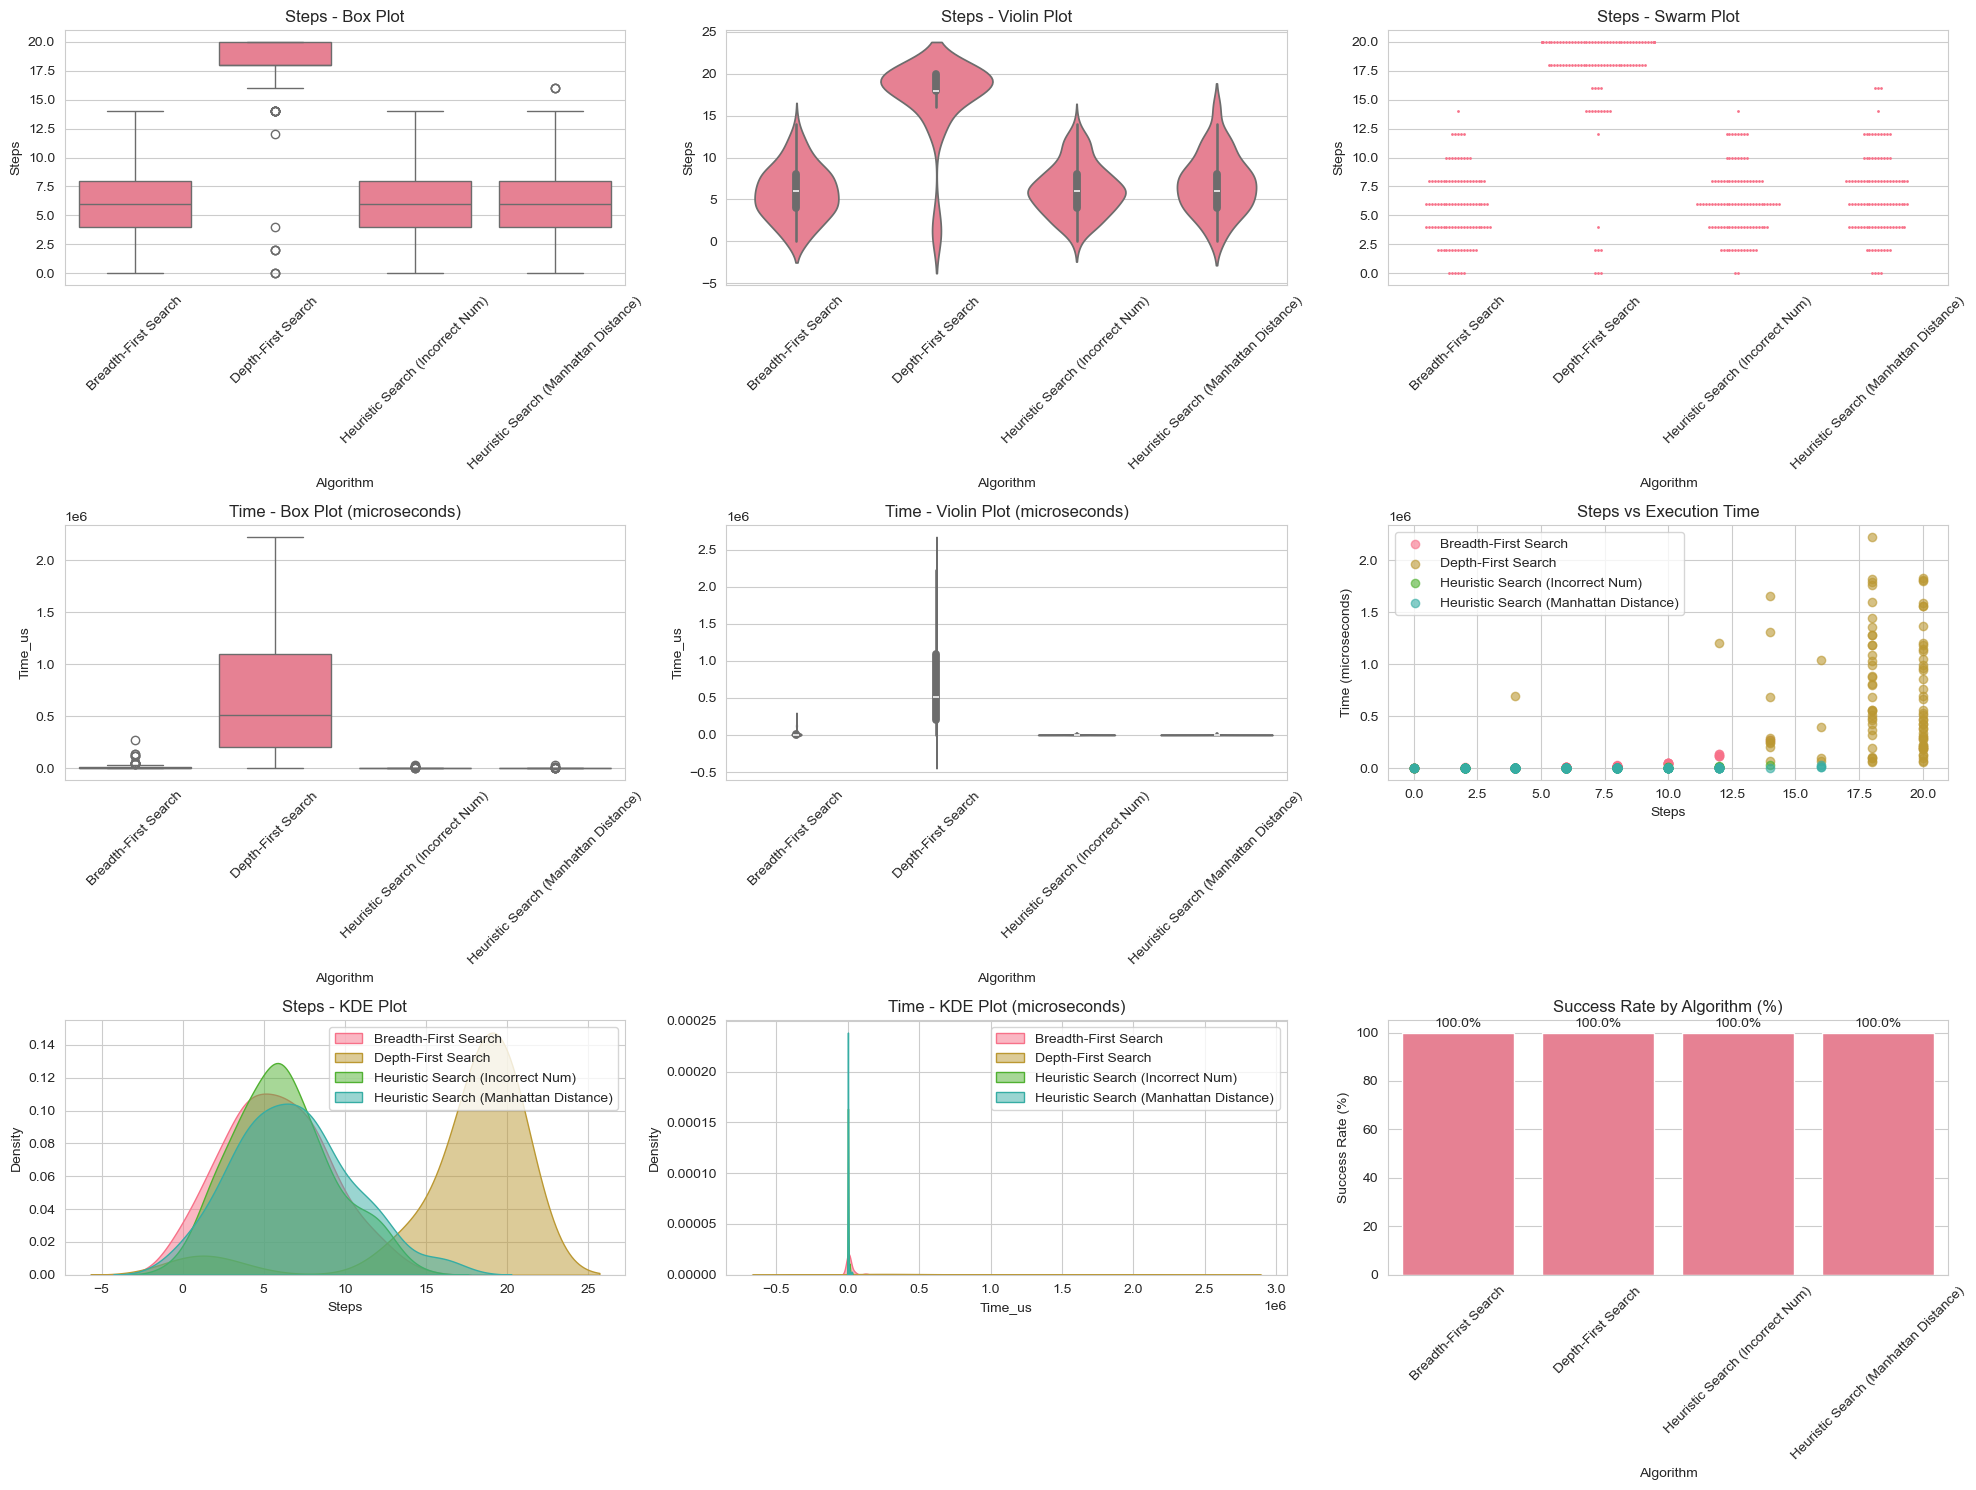


详细统计分析

各算法成功率:
Breadth-First Search: 100/100 (100.00%)
Depth-First Search: 100/100 (100.00%)
Heuristic Search (Incorrect Num): 100/100 (100.00%)
Heuristic Search (Manhattan Distance): 100/100 (100.00%)

步数统计 (仅成功案例):
                                       count   mean       std  min   25%  \
Algorithm                                                                  
Breadth-First Search                   100.0   5.76  3.169042  0.0   4.0   
Depth-First Search                     100.0  17.24  4.771803  0.0  18.0   
Heuristic Search (Incorrect Num)       100.0   6.18  3.036412  0.0   4.0   
Heuristic Search (Manhattan Distance)  100.0   6.82  3.585549  0.0   4.0   

                                        50%   75%   max  
Algorithm                                                
Breadth-First Search                    6.0   8.0  14.0  
Depth-First Search                     18.0  20.0  20.0  
Heuristic Search (Incorrect Num)        6.0   8.0  14.0  
Heuristic Search (Manhattan Distan

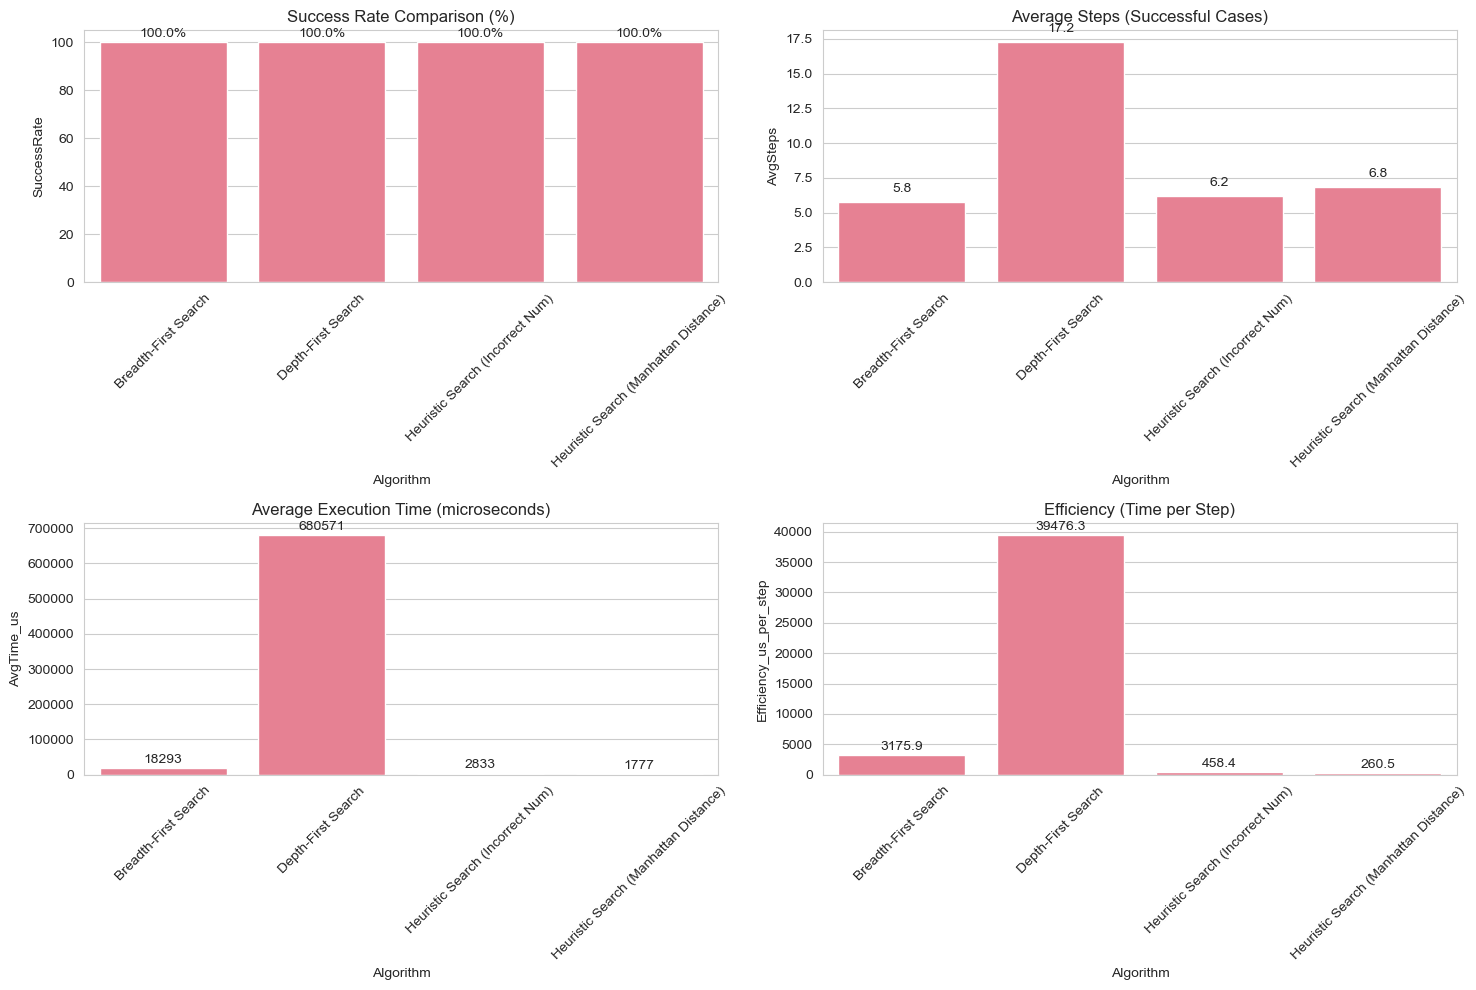


性能指标汇总:
                               Algorithm  SuccessRate  AvgSteps  AvgTime_us  \
0                   Breadth-First Search        100.0      5.76    18293.42   
1                     Depth-First Search        100.0     17.24   680570.74   
2       Heuristic Search (Incorrect Num)        100.0      6.18     2833.13   
3  Heuristic Search (Manhattan Distance)        100.0      6.82     1776.63   

   TimeStd_us  Efficiency_us_per_step  
0    38216.55                 3175.94  
1   562578.31                39476.26  
2     4551.58                  458.44  
3     3400.62                  260.50  


In [5]:
# 使用示例
if __name__ == "__main__":
    file_path = "output.csv"  # 替换为你的文件路径
    
    # 读取并分析数据
    data = plot_swarmplot(file_path)
    
    # 综合比较
    data = comprehensive_comparison(data)
    
    # 性能分析
    metrics = performance_analysis(data)